In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# scaling the features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

##Suppress warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
houses = pd.read_csv('train.csv')

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [4]:
##observe various features - will drop imbalanced features later
houses['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [5]:
houses['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [6]:
houses['Condition2'].value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [7]:
houses['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

In [8]:
houses['MSZoning'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#missing values present
houses.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
##check various distribution 
houses['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

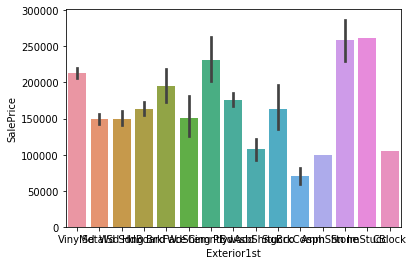

In [12]:
sns.barplot(x='Exterior1st', y='SalePrice',data=houses)


In [13]:
houses.shape

(1460, 81)

In [14]:
##nice to see complete columns while o/p
pd.set_option('display.max_columns', None)

# Data Cleaning

In [15]:
##dropping features with most missing values in column
houses.drop(['Alley','LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
##drop imbalanced column
houses.drop(['Street','Utilities','Condition2','RoofMatl'],axis=1,inplace=True)

In [16]:
##convert years to age - data conversion to give more intuation
houses['YearBuilt'] = houses.YearBuilt.max()-houses.YearBuilt
houses['YearRemodAdd'] = houses.YearRemodAdd.max()-houses.YearRemodAdd
houses['GarageYrBlt'] = houses.GarageYrBlt.max()-houses.GarageYrBlt
houses['YrSold'] = houses.YrSold.max()-houses.YrSold

In [17]:
## check Co-relation to o/p variable..SalesPrice
corr_matrix = houses.corr().abs()

In [18]:
## check vars >0.2 corr
high_corr_var=np.where(corr_matrix>0.2)

In [19]:
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y ]

In [20]:
##Using Num vars with >0.2 corr with SalesPrice
high_corr_var

[('MSSubClass', 'TotalBsmtSF'),
 ('MSSubClass', '1stFlrSF'),
 ('MSSubClass', '2ndFlrSF'),
 ('MSSubClass', 'KitchenAbvGr'),
 ('LotArea', 'BsmtFinSF1'),
 ('LotArea', 'TotalBsmtSF'),
 ('LotArea', '1stFlrSF'),
 ('LotArea', 'GrLivArea'),
 ('LotArea', 'Fireplaces'),
 ('LotArea', 'SalePrice'),
 ('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('OverallQual', 'MasVnrArea'),
 ('OverallQual', 'BsmtFinSF1'),
 ('OverallQual', 'BsmtUnfSF'),
 ('OverallQual', 'TotalBsmtSF'),
 ('OverallQual', '1stFlrSF'),
 ('OverallQual', '2ndFlrSF'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'FullBath'),
 ('OverallQual', 'HalfBath'),
 ('OverallQual', 'TotRmsAbvGrd'),
 ('OverallQual', 'Fireplaces'),
 ('OverallQual', 'GarageYrBlt'),
 ('OverallQual', 'GarageCars'),
 ('OverallQual', 'GarageArea'),
 ('OverallQual', 'WoodDeckSF'),
 ('OverallQual', 'OpenPorchSF'),
 ('OverallQual', 'SalePrice'),
 ('OverallCond', 'YearBuilt'),
 ('OverallCond', 'GarageYrBlt'),
 ('YearBuilt', 'OverallQual'),
 ('YearBuilt',

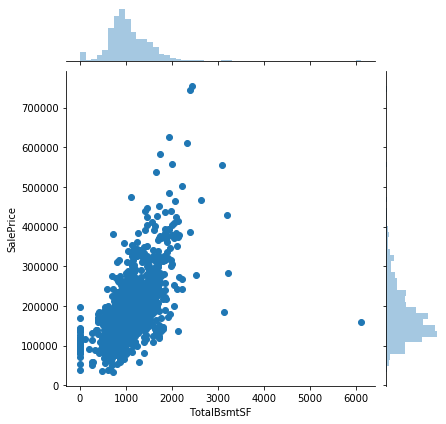

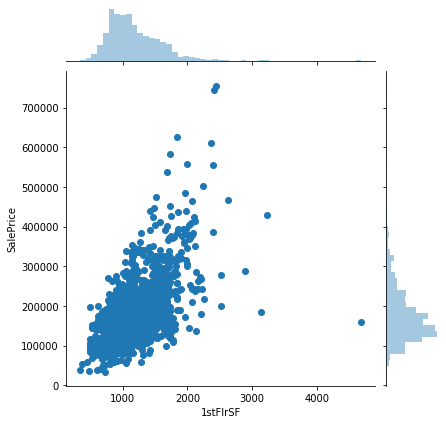

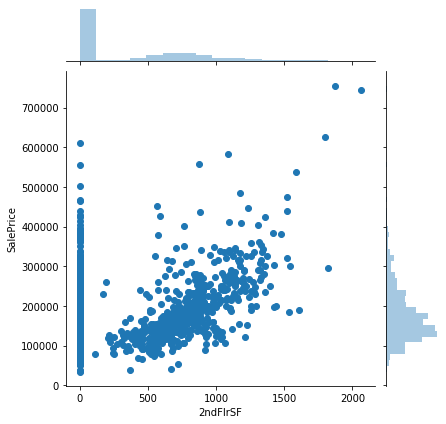

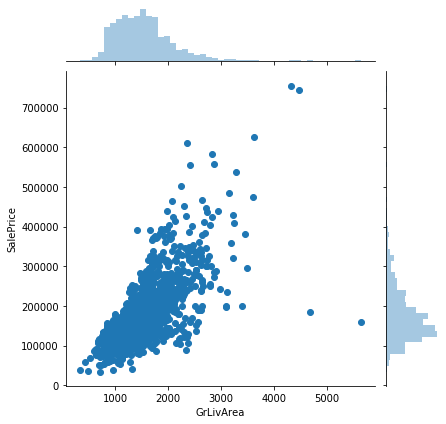

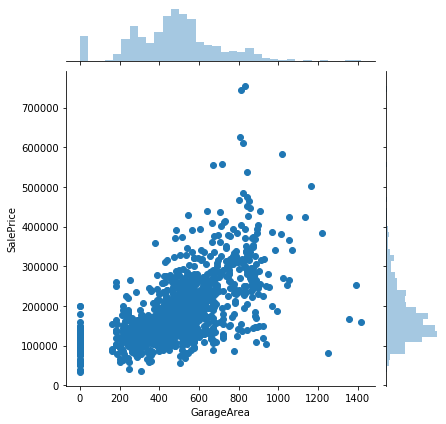

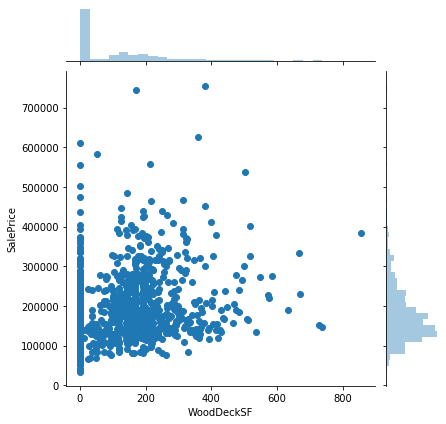

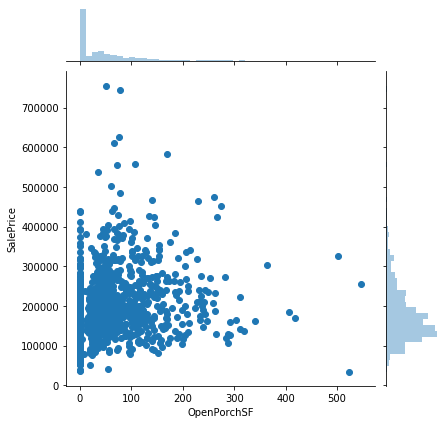

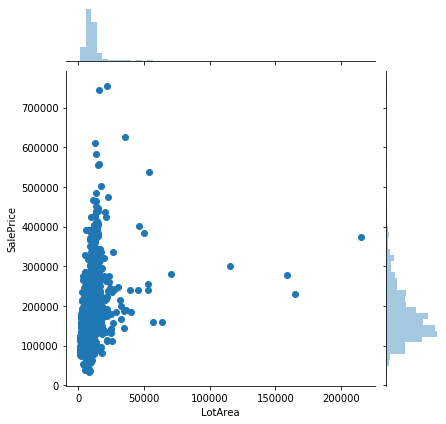

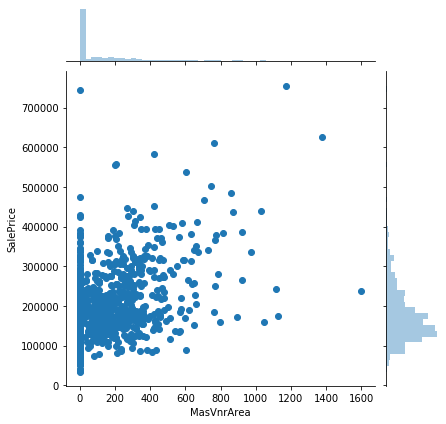

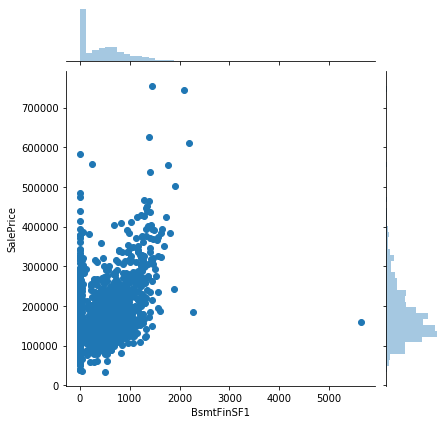

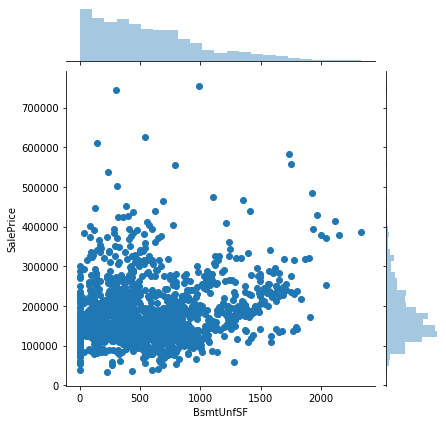

In [21]:
##most features have kind of linear relationship .. so we will use linear regressor and complex function not needed
## seeing outliers in some features.. to be treated
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=houses)
sns.jointplot(x='1stFlrSF',y='SalePrice',data=houses)
sns.jointplot(x='2ndFlrSF',y='SalePrice',data=houses)
sns.jointplot(x='GrLivArea',y='SalePrice',data=houses)
sns.jointplot(x='GarageArea',y='SalePrice',data=houses)
sns.jointplot(x='WoodDeckSF',y='SalePrice',data=houses)
sns.jointplot(x='OpenPorchSF',y='SalePrice',data=houses)
sns.jointplot(x='LotArea',y='SalePrice',data=houses)
sns.jointplot(x='MasVnrArea',y='SalePrice',data=houses)
sns.jointplot(x='BsmtFinSF1',y='SalePrice',data=houses)
sns.jointplot(x='BsmtUnfSF',y='SalePrice',data=houses)


# Data Preparation

In [22]:
houses.shape

(1460, 71)

In [23]:
## check for outliers
houses.describe(percentiles=[0.25,0.50,.90,.95,.99])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,38.732192,25.134247,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,31.493836,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2.184247,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,10.000000,6.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,8.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,37.000000,16.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,30.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,163000.000000
90%,1314.100000,120.000000,14381.700000,8.000000,7.000000,85.100000,60.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,65.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,278000.000000
95%,1387.050000,160.000000,17401.150000,8.000000,8.000000,94.000000,60.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,80.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,4.000000,326100.000000
99%,1445.410000,190.000000,37567.640000,10.000000,9.000000,110.820000,60.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,94.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,4.000000,442567.010000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,138.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,206

In [24]:
##outlier removal.. seeing significant jump between 0 to 25 and 99 to max so selecting IQR as 25 to 99 and applying 1.5*IQR both sides
lst = ['SalePrice','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']
def drop_outliers(x):
    list = []
    for col in lst:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

houses = drop_outliers(houses)

In [25]:
houses.shape

(1366, 71)

In [26]:
houses.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 71, dtype: int64

In [27]:
## Num vars having >0.2 corr with SalesPrice
lst = ['SalePrice','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF']

In [28]:
houses[lst].corr()

,SalePrice,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
SalePrice,1.000000,0.354141,0.791203,-0.511212,-0.509064,0.472286,0.391122,0.217799,0.635048,0.614634,0.320557,0.728282,0.220716,0.558256,0.273457,0.545679,0.449883,-0.490951,0.637644,0.615422,0.315008,0.333346
LotArea,0.354141,1.000000,0.143981,-0.006812,-0.016110,0.124264,0.202653,0.028909,0.276039,0.360311,0.106162,0.358741,0.133216,0.142366,0.069872,0.295252,0.294701,0.007085,0.237531,0.268405,0.220300,0.153793
OverallQual,0.791203,0.143981,1.000000,-0.570822,-0.556998,0.399226,0.208326,0.322107,0.537023,0.466064,0.288462,0.590896,0.101484,0.559141,0.261831,0.427028,0.381880,-0.546445,0.581933,0.522445,0.232434,0.308438
YearBuilt,-0.511212,-0.006812,-0.570822,1.000000,0.616533,-0.302453,-0.232585,-0.158607,-0.390459,-0.263253,-0.015333,-0.193923,-0.180668,-0.485321,-0.232246,-0.101610,-0.116052,0.824487,-0.523665,-0.444830,-0.217267,-0.215430
YearRemodAdd,-0.509064,-0.016110,-0.556998,0.616533,1.000000,-0.169785,-0.111758,-0.188768,-0.292078,-0.239695,-0.126707,-0.280706,-0.114447,-0.446985,-0.179472,-0.175481,-0.101909,0.641246,-0.450952,-0.381973,-0.209896,-0.229986
MasVnrArea,0.472286,0.124264,0.399226,-0.302453,-0.169785,1.000000,0.239672,0.114282,0.345999,0.324427,0.170693,0.381174,0.081197,0.271778,0.195304,0.281791,0.227080,-0.252559,0.365396,0.361327,0.151586,0.119780
BsmtFinSF1,0.391122,0.202653,0.208326,-0.232585,-0.111758,0.239672,1.000000,-0.526426,0.465344,0.395240,-0.158890,0.148578,0.651689,0.033608,-0.017559,0.016415,0.227367,-0.152342,0.208181,0.261050,0.192732,0.091791
BsmtUnfSF,0.217799,0.028909,0.322107,-0.158607,-0.188768,0.114282,-0.526426,1.000000,0.435267,0.327675,-0.005925,0.235402,-0.423852,0.296370,-0.051560,0.235618,0.053416,-0.191485,0.245381,0.205658,-0.000379,0.133390
TotalBsmtSF,0.635048,0.276039,0.537023,-0.390459,-0.292078,0.345999,0.465344,0.435267,1.000000,0.806931,-0.215654,0.401661,0.292829,0.317763,-0.086777,0.253101,0.310949,-0.332926,0.453574,0.478256,0.228958,0.244352
1stFlrSF,0.614634,0.360311,0.466064,-0.263253,-0.239695,0.324427,0.395240,0.327675,0.806931,1.000000,-0.235473,0.528969,0.231311,0.367742,-0.155894,0.388965,0.386731,-0.237528,0.453443,0.483475,0.228292,0.208651


In [29]:
## derived variable
houses['totalSF']=houses['TotalBsmtSF'] + houses['1stFlrSF'] + houses['2ndFlrSF']


In [30]:
## dropping columns having strong correlation between dependent vars  and may not be imp from bz perspective or already covered with derived var
houses.drop(['GarageYrBlt','YearRemodAdd','BsmtFullBath','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GarageCars','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)

In [31]:
## recheck corr between remaining continous vars
houses[['SalePrice','LotArea','OverallQual','YearBuilt','MasVnrArea','TotRmsAbvGrd','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','totalSF']].corr()

,SalePrice,LotArea,OverallQual,YearBuilt,MasVnrArea,TotRmsAbvGrd,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,totalSF
SalePrice,1.000000,0.354141,0.791203,-0.511212,0.472286,0.545679,0.558256,0.273457,0.449883,0.615422,0.315008,0.333346,0.819204
LotArea,0.354141,1.000000,0.143981,-0.006812,0.124264,0.295252,0.142366,0.069872,0.294701,0.268405,0.220300,0.153793,0.382175
OverallQual,0.791203,0.143981,1.000000,-0.570822,0.399226,0.427028,0.559141,0.261831,0.381880,0.522445,0.232434,0.308438,0.676723
YearBuilt,-0.511212,-0.006812,-0.570822,1.000000,-0.302453,-0.101610,-0.485321,-0.232246,-0.116052,-0.444830,-0.217267,-0.215430,-0.344824
MasVnrArea,0.472286,0.124264,0.399226,-0.302453,1.000000,0.281791,0.271778,0.195304,0.227080,0.361327,0.151586,0.119780,0.439034
TotRmsAbvGrd,0.545679,0.295252,0.427028,-0.101610,0.281791,1.000000,0.546721,0.348901,0.326213,0.357776,0.166613,0.235286,0.672892
FullBath,0.558256,0.142366,0.559141,-0.485321,0.271778,0.546721,1.000000,0.132802,0.230237,0.425715,0.182546,0.279316,0.587436
HalfBath,0.273457,0.069872,0.261831,-0.232246,0.195304,0.348901,0.132802,1.000000,0.200678,0.125328,0.098204,0.206786,0.229758
Fireplaces,0.449883,0.294701,0.381880,-0.116052,0.227080,0.326213,0.230237,0.200678,1.000000,0.198564,0.181218,0.170632,0.462809
GarageArea,0.615422,0.268405,0.522445,-0.444830,0.361327,0.357776,0.425715,0.125328,0.198564,1.000000,0.200813,0.262005,0.562005


In [32]:
houses.shape

(1366, 62)

In [33]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1366 non-null   int64  
 1   MSSubClass     1366 non-null   int64  
 2   MSZoning       1366 non-null   object 
 3   LotArea        1366 non-null   int64  
 4   LotShape       1366 non-null   object 
 5   LandContour    1366 non-null   object 
 6   LotConfig      1366 non-null   object 
 7   LandSlope      1366 non-null   object 
 8   Neighborhood   1366 non-null   object 
 9   Condition1     1366 non-null   object 
 10  BldgType       1366 non-null   object 
 11  HouseStyle     1366 non-null   object 
 12  OverallQual    1366 non-null   int64  
 13  OverallCond    1366 non-null   int64  
 14  YearBuilt      1366 non-null   int64  
 15  RoofStyle      1366 non-null   object 
 16  Exterior1st    1366 non-null   object 
 17  Exterior2nd    1366 non-null   object 
 18  MasVnrTy

In [34]:
houses['GarageCond'].value_counts()

TA    1313
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [35]:
## assigning values to ordered categorical data
#houses['Utilities'] = houses['Utilities'].map({'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0})
houses['ExterQual']= houses['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
houses['ExterCond'] = houses['ExterCond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
houses['BsmtQual']= houses['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
houses['BsmtCond'] = houses['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
houses['BsmtExposure'] = houses['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
houses['BsmtFinType1'] = houses['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
houses['BsmtFinType2'] = houses['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
houses['HeatingQC'] = houses['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
houses['GarageQual'] = houses['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
houses['GarageCond'] = houses['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
houses['KitchenQual'] = houses['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})

In [36]:
# creating dummy variables for categorical variables

# subset all categorical variables
houses_categorical = houses.select_dtypes(include=['object'])
houses_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [37]:
houses_categorical.shape

(1366, 23)

In [38]:
# convert into dummies
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
houses_dummies.shape

(1366, 138)

In [40]:
# drop categorical variables 
houses.drop(list(houses_categorical.columns), axis=1, inplace=True)

In [41]:
houses.shape

(1366, 39)

In [42]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1366 non-null   int64  
 1   MSSubClass     1366 non-null   int64  
 2   LotArea        1366 non-null   int64  
 3   OverallQual    1366 non-null   int64  
 4   OverallCond    1366 non-null   int64  
 5   YearBuilt      1366 non-null   int64  
 6   MasVnrArea     1366 non-null   float64
 7   ExterQual      1366 non-null   int64  
 8   ExterCond      1366 non-null   int64  
 9   BsmtQual       1336 non-null   float64
 10  BsmtCond       1336 non-null   float64
 11  BsmtExposure   1335 non-null   float64
 12  BsmtFinType1   1336 non-null   float64
 13  BsmtFinType2   1335 non-null   float64
 14  BsmtFinSF2     1366 non-null   int64  
 15  HeatingQC      1366 non-null   int64  
 16  LowQualFinSF   1366 non-null   int64  
 17  BsmtHalfBath   1366 non-null   int64  
 18  FullBath

In [43]:
# concat dummy variables with X
houses = pd.concat([houses, houses_dummies], axis=1)

In [44]:
houses.shape

(1366, 177)

In [45]:
lst = ['SalePrice','TotRmsAbvGrd','LotArea','OverallQual','YearBuilt','MasVnrArea','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','totalSF','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','GarageCond']

In [46]:
lst

['SalePrice',
 'TotRmsAbvGrd',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'totalSF',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'GarageCond']

In [47]:
## Numeric + categorical vars to be used for model building
lst.extend(houses_dummies.columns)

In [48]:
len(lst)

158

In [49]:
lst

['SalePrice',
 'TotRmsAbvGrd',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'MasVnrArea',
 'FullBath',
 'HalfBath',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'totalSF',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'GarageCond',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTow

In [50]:
houses.shape

(1366, 177)

In [51]:
## Final input dataframe
houses = houses[lst]

In [52]:
houses.isnull().sum().sum()

122

In [53]:
#houses['BsmtQual'].value_counts()

In [54]:
## Imputing null values
#houses['BsmtQual'].fillna(0,inplace=True)
houses['BsmtCond'].fillna(0,inplace=True)
houses['BsmtExposure'].fillna(0,inplace=True)
houses['BsmtFinType1'].fillna(0,inplace=True)
houses['BsmtFinType2'].fillna(0,inplace=True)


In [55]:
## recheck null values
houses.isnull().sum().sum()

0

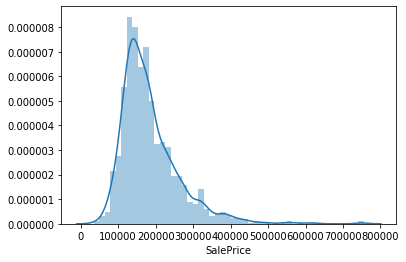

In [56]:
##Target Variables distribution - righr skewed distribution
sns.distplot(houses['SalePrice'])

In [57]:
## applying log transformation to make it closer to normal dist
houses['SalePrice'] = np.log(houses['SalePrice'])

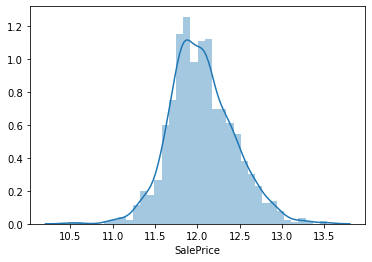

In [58]:
sns.distplot(houses['SalePrice'])

In [59]:
## recheck outliers
houses.describe(percentiles=[0.25,0.50,.90,.95,.99])

,SalePrice,TotRmsAbvGrd,LotArea,OverallQual,YearBuilt,MasVnrArea,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,totalSF,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000,1

In [60]:
houses.shape

(1366, 158)

In [61]:
houses.head()

,SalePrice,TotRmsAbvGrd,LotArea,OverallQual,YearBuilt,MasVnrArea,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,totalSF,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,GarageCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.247694,8,8450,7,7,196.0,2,1,0,548,0,61,2566,2,3.0,1.0,6.0,1.0,4,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,12.109011,6,9600,6,34,0.0,2,0,1,460,298,0,2524,2,3.0,4.0,5.0,1.0,4,3,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,12.317167,6,11250,7,9,162.0,2,1,1,608,0,42,2706,2,3.0,2.0,6.0,1.0,4,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,11.849398,7,9550,7,95,0.0,1,0,1,642,0,35,2473,2,4.0,1.0,5.0,1.0,3,3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0

# Model Building

In [62]:
houses_train, houses_test = train_test_split(houses, train_size=0.7, random_state=100)

In [63]:
##scaling vars
num_col = ['LotArea','TotRmsAbvGrd','OverallQual','YearBuilt','MasVnrArea','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','totalSF','ExterCond','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','GarageCond']
#num_col = ['LotArea','OverallQual','YearBuilt','MasVnrArea','FullBath','HalfBath','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','totalSF','Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','GarageQual','GarageCond','KitchenQual']
scaler = MinMaxScaler()
houses_train[num_col] = scaler.fit_transform(houses_train[num_col])
houses_test[num_col] = scaler.transform(houses_test[num_col])

In [64]:
y_train = houses_train.pop('SalePrice')
X_train = houses_train

In [65]:
houses.shape

(1366, 158)

In [66]:
## since number of cols are high, using RFE to select top 30

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotRmsAbvGrd', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('MasVnrArea', False, 103),
 ('FullBath', False, 54),
 ('HalfBath', False, 33),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('totalSF', True, 1),
 ('ExterCond', False, 86),
 ('BsmtCond', False, 79),
 ('BsmtExposure', False, 36),
 ('BsmtFinType1', False, 6),
 ('BsmtFinType2', False, 70),
 ('HeatingQC', True, 1),
 ('GarageCond', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 51),
 ('LotShape_IR3', False, 75),
 ('LotShape_Reg', False, 111),
 ('LandContour_HLS', False, 53),
 ('LandContour_Low', False, 101),
 ('LandContour_Lvl', False, 55),
 ('LotConfig_CulDSac', False, 60),
 ('LotConfig_FR2', False, 83),
 ('LotConfig_FR3', False, 35),
 ('LotConfig_Inside', False, 109),
 ('LandSlope_Mod', False, 67),
 ('LandSlope_Sev', False, 4),
 ('

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['TotRmsAbvGrd', 'LotArea', 'OverallQual', 'YearBuilt', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'totalSF', 'HeatingQC',
       'GarageCond', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'RoofStyle_Shed', 'Foundation_Stone', 'Heating_Wall', 'CentralAir_Y',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [71]:
import statsmodels.api as sm

In [72]:
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)

In [73]:
ml = sm.OLS(y_train,X_train_sm).fit()

In [74]:
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 27 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                 598.20
No. Observations:                 956   AIC:                            -1134.
Df Residuals:                     925   BIC:                            -983.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.4885      0.084    124.266      0.000      10.323      10.654
TotRmsAbvGrd              0.1578      0.037      4.298      0.000       0.086       0.230
LotArea                   0.2906      0.052      5.570      0.000       0.188       0.393
OverallQual               0.6058      0.045     13.506      0.000       0.518       0.694
YearBuilt                -0.2446      0.031     -7.906      0.000      -0.305      -0.184
Fireplaces                0.1251      0.024      5.160      0.000       0.078       0.173
GarageArea                0.3068      0.039      7.848      0.000       0.230       0.383
WoodDeckSF                0.1123      0.028      4.045      0.000       0.058       0.167
OpenPorchSF               0.1204      0.039      3.062      0.002       0.043       0.198
totalSF                   1.0140      0.075     13.481      0.000       0.866       1.162
HeatingQC                 0.1160      0.022      5.226      0.000       0.072       0.160
GarageCond                0.2083      0.085      2.444      0.015       0.041       0.376
MSZoning_FV               0.5312      0.074      7.211      0.000       0.387       0.676
MSZoning_RH               0.4263      0.081      5.274      0.000       0.268       0.585
MSZoning_RL               0.4945      0.070      7.111      0.000       0.358       0.631
MSZoning_RM               0.4598      0.070      6.581      0.000       0.323       0.597
Neighborhood_BrDale      -0.1246      0.041     -3.007      0.003      -0.206      -0.043
Neighborhood_Crawfor      0.1850      0.024      7.593      0.000       0.137       0.233
Neighborhood_MeadowV     -0.1565      0.048     -3.286      0.001      -0.250      -0.063
Neighborhood_StoneBr      0.1420      0.032      4.500      0.000       0.080       0.204
BldgType_Duplex          -0.1193      0.032     -3.787      0.000      -0.181      -0.057
RoofStyle_Shed           -0.1123      0.136     -0.826      0.409      -0.379       0.155
Foundation_Stone          0.1761      0.070      2.514      0.012       0.039       0.314
Heating_Wall              0.2299      0.085      2.709      0.007       0.063       0.397
CentralAir_Y              0.1221      0.025      4.960      0.000       0.074       0.170
Functional_Maj2          -0.3326      0.094     -3.551      0.000      -0.516      -0.149
Functional_Sev           -0.4692      0.133     -3.531      0.000      -0.730      -0.208
SaleType_Con              0.2632      0.132      1.987      0.047       0.003       0.523
SaleType_ConLD            0.1009      0.063      1.599      0.110      -0.023       0.225
SaleType_New              0.2155      0.100      2.153      0.032       0.019       0.412
SaleCondition_Partial    -0.1975      0.099     -1.995      0.046      -0.392      -0.003
=======================

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
X_train_new = X_train_sm.drop(['const'], axis=1)
rfe = pd.DataFrame()
rfe['features'] = X_train_new.columns
rfe['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
rfe['VIF'] = round(rfe['VIF'],2)
rfe.sort_values(by='VIF',ascending=False,inplace=True)
rfe

## continuing with lasso regression and recheck VIF after lasso feature selection

,features,VIF
13,MSZoning_RL,79.50
10,GarageCond,76.83
29,SaleCondition_Partial,47.52
28,SaleType_New,47.41
2,OverallQual,33.91
23,CentralAir_Y,31.83
8,totalSF,25.94
9,HeatingQC,18.34
14,MSZoning_RM,16.02
0,TotRmsAbvGrd,14.05


# Lasso

In [77]:
X_train_new = X_train[col]

In [78]:
X_train_new.shape

(956, 30)

In [79]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5, 1.0, 5.0, 10.0]}


lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.02,
                                   0.05, 0.1, 0.2, 0.5, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009294,0.002812,0.001719,0.000211,0.0001,{'alpha': 0.0001},0.882711,0.796926,0.863779,0.885936,0.891449,0.864160,0.034881,1,0.878873,0.899048,0.881796,0.878688,0.875935,0.882868,0.008300
1,0.003822,0.000435,0.001356,0.000199,0.001,{'alpha': 0.001},0.884058,0.798471,0.848891,0.878144,0.874115,0.856736,0.031506,2,0.860676,0.882926,0.869555,0.861889,0.863634,0.867736,0.008184
2,0.003263,0.000427,0.001319,0.000158,0.002,{'alpha': 0.002},0.875890,0.804254,0.839805,0.864413,0.864904,0.849853,0.025677,3,0.852556,0.876036,0.861747,0.854181,0.856243,0.860153,0.008526
3,0.003004,0.000408,0.001411,0.000442,0.005,{'alpha': 0.005},0.842317,0.805891,0.814774,0.828462,0.833792,0.825047,0.013106,4,0.824166,0.842673,0.836196,0.828260,0.829281,0.832115,0.006545
4,0.003205,0.000564,0.001262,0.000099,0.01,{'alpha': 0.01},0.781033,0.773272,0.770890,0.770877,0.778190,0.774852,0.004083,5,0.771456,0.787288,0.787146,0.780247,0.778426,0.780913,0.005925
5,0.004210,0.000642,0.001885,0.000499,0.02,{'alpha': 0.02},0.614567,0.618873,0.618992,0.605865,0.623250,0.616309,0.005900,6,0.614020,0.620781,0.629475,0.627317,0.624369,0.623192,0.005437
6,0.003157,0.000476,0.001263,0.000263,0.05,{'alpha': 0.05},0.013977,0.032393,0.035805,0.055837,0.045332,0.036669,0.013974,7,0.015791,0.034101,0.054162,0.063410,0.045240,0.042541,0.016521
7,0.003152,0.000317,0.001482,0.000208,0.1,{'alpha': 0.1},-0.001569,-0.001713,-0.022569,-0.005927,-0.000246,-0.006405,0.008305,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.003183,0.000219,0.001470,0.000208,0.2,{'alpha': 0.2},-0.001569,-0.001713,-0.022569,-0.005927,-0.000246,-0.006405,0.008305,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.003401,0.000201,0.001449,0.000062,0.5,{'alpha': 0.5},-0.001569,-0.001713,-0.022569,-0.005927,-0.000246,-0.006405,0.008305,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


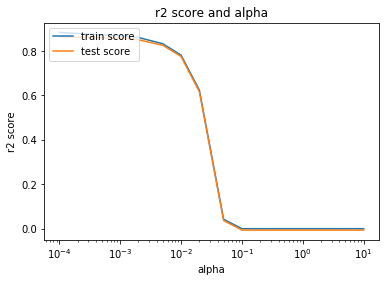

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log')

plt.show()

In [82]:
## Optimal values of regularization param is 0.005 after which both test and train r2 score dropping below 80 significantly.. assuming bz need min 0.8 R2
alpha =0.005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Ridge

In [83]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [84]:
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results_ridge.head(30)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005064,0.003259,0.001766,0.000529,0.0001,{'alpha': 0.0001},0.882343,0.794160,0.869262,0.885302,0.893526,0.864918,0.036230,10,0.879695,0.899915,0.882461,0.879462,0.876754,0.883657,0.008327
1,0.002837,0.000365,0.001275,0.000202,0.001,{'alpha': 0.001},0.882351,0.794191,0.869238,0.885326,0.893518,0.864925,0.036220,9,0.879695,0.899915,0.882461,0.879462,0.876754,0.883657,0.008327
2,0.003226,0.000415,0.001276,0.000156,0.01,{'alpha': 0.01},0.882431,0.794496,0.869000,0.885557,0.893436,0.864984,0.036116,7,0.879693,0.899912,0.882459,0.879459,0.876752,0.883655,0.008327
3,0.003345,0.000743,0.001370,0.000201,0.05,{'alpha': 0.05},0.882749,0.795754,0.867978,0.886447,0.893055,0.865196,0.035681,5,0.879648,0.899861,0.882429,0.879407,0.876717,0.883612,0.008323
4,0.003367,0.000644,0.001407,0.000250,0.1,{'alpha': 0.1},0.883074,0.797137,0.866785,0.887301,0.892551,0.865370,0.035188,3,0.879524,0.899721,0.882346,0.879266,0.876622,0.883496,0.008313
5,0.002438,0.000261,0.001099,0.000206,0.2,{'alpha': 0.2},0.883537,0.799436,0.864666,0.888403,0.891506,0.865510,0.034326,1,0.879124,0.899279,0.882086,0.878827,0.876322,0.883127,0.008280
6,0.003654,0.001262,0.001470,0.000379,0.3,{'alpha': 0.3},0.883816,0.801297,0.862850,0.888979,0.890462,0.865481,0.033583,2,0.878601,0.898713,0.881753,0.878272,0.875941,0.882656,0.008239
7,0.002826,0.000442,0.001415,0.000513,0.4,{'alpha': 0.4},0.883966,0.802856,0.861277,0.889233,0.889447,0.865356,0.032923,4,0.878016,0.898087,0.881382,0.877667,0.875520,0.882135,0.008194
8,0.002569,0.000308,0.001076,0.000112,0.5,{'alpha': 0.5},0.884021,0.804197,0.859897,0.889283,0.888472,0.865174,0.032328,6,0.877402,0.897434,0.880992,0.877045,0.875081,0.881591,0.008148
9,0.002654,0.000386,0.001015,0.000032,0.6,{'alpha': 0.6},0.884006,0.805373,0.858670,0.889199,0.887539,0.864957,0.031781,8,0.876778,0.896772,0.880592,0.876423,0.874637,0.881040,0.008102


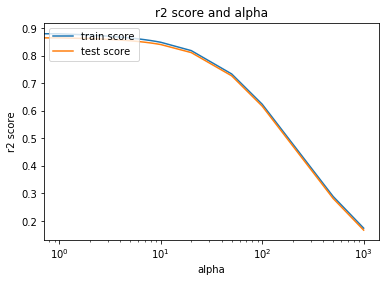

In [85]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xscale('log')

plt.show()

In [86]:
## Optimal values of regularization param is around 20 for ridge after which r2 score dropping for both train/test significantly
alpha =20

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train_new, y_train) 

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [87]:
ridge.coef_

array([ 2.75290206e-01,  1.37300324e-01,  4.50393060e-01, -2.27016906e-01,
        2.13640856e-01,  2.93098357e-01,  1.43203369e-01,  1.38918165e-01,
        3.42734084e-01,  1.82133723e-01,  3.61574833e-02,  6.36636778e-02,
       -2.07141932e-02,  7.69028525e-02, -2.14167395e-02, -5.14651808e-02,
        1.11759223e-01, -5.68720303e-02,  1.05903216e-01, -6.04598262e-02,
       -6.62605140e-03,  1.92144908e-02, -4.25656070e-04,  9.71749079e-02,
       -3.13231730e-02, -1.80388766e-02,  1.57528544e-02,  7.10217329e-03,
        4.51700515e-02,  3.25499274e-02])

In [88]:
lasso.coef_

array([ 0.13497112,  0.        ,  0.81296623, -0.1412463 ,  0.1653358 ,
        0.25721179,  0.02014959,  0.        ,  0.74008059,  0.13642692,
        0.        ,  0.        , -0.        ,  0.06487105, -0.03127826,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.02708327, -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ])

In [89]:
X_train_new.head()

,TotRmsAbvGrd,LotArea,OverallQual,YearBuilt,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,totalSF,HeatingQC,GarageCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_BrDale,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_StoneBr,BldgType_Duplex,RoofStyle_Shed,Foundation_Stone,Heating_Wall,CentralAir_Y,Functional_Maj2,Functional_Sev,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_Partial
456,0.444444,0.058515,0.375,0.723077,0.000000,0.286992,0.000000,0.000000,0.175923,0.25,0.25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,0.666667,0.288426,0.875,0.015385,0.333333,0.817886,0.000000,0.109689,0.525796,1.00,0.50,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
757,0.333333,0.184544,0.500,0.246154,0.333333,0.227642,0.460165,0.000000,0.188610,0.50,0.50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1040,0.555556,0.211538,0.375,0.407692,0.333333,0.263415,0.000000,0.000000,0.312518,1.00,0.50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1344,0.555556,0.175367,0.625,0.030769,0.333333,0.227642,0.000000,0.000000,0.206372,1.00,0.50,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [90]:
X_train_new.columns

Index(['TotRmsAbvGrd', 'LotArea', 'OverallQual', 'YearBuilt', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'totalSF', 'HeatingQC',
       'GarageCond', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'RoofStyle_Shed', 'Foundation_Stone', 'Heating_Wall', 'CentralAir_Y',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

**Lasso helped feature selection making some of less significant coeff to 0 as observed above hence continuing with Lasso model on test data**

In [91]:
##fitting on test data
y_test = houses_test.pop('SalePrice')
X_test = houses_test[['TotRmsAbvGrd', 'LotArea', 'OverallQual', 'YearBuilt', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'totalSF', 'HeatingQC',
       'GarageCond', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_StoneBr', 'BldgType_Duplex',
       'RoofStyle_Shed', 'Foundation_Stone', 'Heating_Wall', 'CentralAir_Y',
       'Functional_Maj2', 'Functional_Sev', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleCondition_Partial']]

In [92]:
y_pred = lasso.predict(X_test)

In [93]:
## test R2
r2_score(y_test,y_pred)

0.8299697321585789

In [94]:
y_train_pred = lasso.predict(X_train_new)

In [95]:
## train R2
r2_score(y_train,y_train_pred)

0.8314577246293847

In [96]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
final = list(zip(cols, model_parameters))

In [97]:
posval = lambda x:  x[1] > 0 or x[1] <= 0

In [98]:
div = filter(posval, final)

In [99]:
abc = list(div)

In [100]:
abc.sort(key=lambda x : abs(x[1]),reverse=True)

In [101]:
## Final Model params with co-eff values in descending order indicating significance 
abc

[('constant', 11.13),
 ('OverallQual', 0.813),
 ('totalSF', 0.74),
 ('GarageArea', 0.257),
 ('Fireplaces', 0.165),
 ('YearBuilt', -0.141),
 ('HeatingQC', 0.136),
 ('TotRmsAbvGrd', 0.135),
 ('MSZoning_RL', 0.065),
 ('MSZoning_RM', -0.031),
 ('CentralAir_Y', 0.027),
 ('WoodDeckSF', 0.02),
 ('LotArea', 0.0),
 ('OpenPorchSF', 0.0),
 ('GarageCond', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_StoneBr', 0.0),
 ('BldgType_Duplex', -0.0),
 ('RoofStyle_Shed', -0.0),
 ('Foundation_Stone', 0.0),
 ('Heating_Wall', -0.0),
 ('Functional_Maj2', -0.0),
 ('Functional_Sev', -0.0),
 ('SaleType_Con', 0.0),
 ('SaleType_ConLD', -0.0),
 ('SaleType_New', 0.0),
 ('SaleCondition_Partial', 0.0)]

# Conclusion

    - Optimal alpha for lasso = 0.005 and ridge = 20
    - Train/test R2 with lasso model : 0.831 and 0.829  
    - Top predictors - overall quality, total sq ft area of basement/1st/2nd floor,  Garage space, fireplace, age of property, Total rooms above grade etc
